<a href="https://colab.research.google.com/github/cuongcodeF4/Artificial-Intelligence/blob/main/KT_giuaki/10FoodVN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I. Khai báo các thư viện cần thiết

In [39]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils.image_utils import img_to_array 
from keras.utils import load_img 
from numpy.lib.npyio import load
import numpy as np

In [40]:
folder='/content/drive/MyDrive/Colab Notebooks/10FoodVN/Image/'
photos,labels = list(),list()
for file in listdir(folder):
  if file.startswith('miquang'):
    output = 0.0     
  if file.startswith('comtam'):
    output = 1.0    
  if file.startswith('banhmi'):
    output = 2.0    
  if file.startswith('goicuon'):
    output = 3.0    
  if file.startswith('banhxeo'):
    output = 4.0   
  if file.startswith('buncha'):
    output = 5.0   
  if file.startswith('pho'):
    output = 6.0  
  if file.startswith('banhcuon'):
    output = 7.0  
  if file.startswith('che'):
    output = 8.0  
  if file.startswith('bunbo'):
    output = 9.0  

  photo = load_img(folder+file, target_size= (32,32))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos= asarray(photos)
labels = asarray(labels)
save('/content/drive/MyDrive/Colab Notebooks/10FoodVN/10FoodVN_photo.npy',photos)
save('/content/drive/MyDrive/Colab Notebooks/10FoodVN/10FoodVN_label.npy',labels)

In [41]:
photo = np.load('/content/drive/MyDrive/Colab Notebooks/10FoodVN/10FoodVN_photo.npy')
label = np.load('/content/drive/MyDrive/Colab Notebooks/10FoodVN/10FoodVN_label.npy')

In [42]:
split_sample = int(0.2*len(photo))
(x_train,y_train) = photo[split_sample:],label[split_sample:]
(x_test,y_test)= photo[:split_sample],label[:split_sample]

In [43]:
x_train.shape

(480, 32, 32, 3)

In [44]:
x_test.shape

(120, 32, 32, 3)

In [45]:
x_train = x_train.reshape(480,32,32,3)
x_test = x_test.reshape(120,32,32,3)
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [46]:
# chuyển đổi các nhãn lớp của dữ liệu huấn luyện và kiểm tra thành các vectơ one-hot encoding.
from keras.utils import to_categorical
y_train = to_categorical(y_train,10)
y_test  = to_categorical(y_test,10)

In [47]:
from keras.models import Sequential , Model
from keras.layers import Dense , Flatten, Dropout, Conv2D, MaxPooling2D ,Normalization,Input
from keras.optimizers import Adam 

In [48]:
batch_size = 100  # số lượng học
epochs = 40      #số lần học
classes = 10

In [49]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation ='linear',input_shape= (32,32,3),padding= 'same'))    # 32:số lần tích chập, (3,3): kích thước bộ lọc

from keras.layers import LeakyReLU
model.add(LeakyReLU(alpha= 0.1))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(64,(3,3), activation= 'linear', padding= 'same'))
model.add(LeakyReLU(alpha= 0.1))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(128,(3,3), activation= 'linear', padding= 'same'))
model.add(LeakyReLU(alpha= 0.1))
model.add(MaxPooling2D((2,2), padding= 'same'))

from keras.backend import categorical_crossentropy
from keras.losses import categorical_crossentropy
model.add(Flatten())  #Tín hiệu vào là tấm ảnh 
model.add(Dense(1024, activation= 'linear'))
model.add(LeakyReLU(alpha= 0.1))
model.add(Dense(512, activation= 'linear'))
model.add(LeakyReLU(alpha= 0.1))
model.add(Dense(128,activation='linear'))   #Đi qua 128 lớp
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 leaky_re_lu_18 (LeakyReLU)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 leaky_re_lu_19 (LeakyReLU)  (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                 

In [49]:
from keras.models import load_model
# Tải mô hình từ file đã lưu
model = load_model('/content/drive/MyDrive/Colab Notebooks/10FoodVN/10FoodVN.h5')

In [50]:
model.compile(loss= categorical_crossentropy,optimizer= Adam(),metrics=['accuracy'])
train = model.fit(x_train,y_train,batch_size= batch_size,epochs=epochs,verbose =1)      # verbose=1,Hiển thị giá trị train, chỉ xuất hiện 1 lần rồi biến mất

Epoch 1/40
5/5 [==============================] - 9s 62ms/step - loss: 2.2319 - accuracy: 0.0771
Epoch 2/40
5/5 [==============================] - 0s 7ms/step - loss: 2.1375 - accuracy: 0.1312
Epoch 3/40
5/5 [==============================] - 0s 8ms/step - loss: 2.0017 - accuracy: 0.2208
Epoch 4/40
5/5 [==============================] - 0s 7ms/step - loss: 1.8672 - accuracy: 0.2417
Epoch 5/40
5/5 [==============================] - 0s 7ms/step - loss: 1.7608 - accuracy: 0.3313
Epoch 6/40
5/5 [==============================] - 0s 7ms/step - loss: 1.7099 - accuracy: 0.3417
Epoch 7/40
5/5 [==============================] - 0s 7ms/step - loss: 1.6096 - accuracy: 0.3729
Epoch 8/40
5/5 [==============================] - 0s 7ms/step - loss: 1.5326 - accuracy: 0.4104
Epoch 9/40
5/5 [==============================] - 0s 7ms/step - loss: 1.4155 - accuracy: 0.4875
Epoch 10/40
5/5 [==============================] - 0s 8ms/step - loss: 1.3558 - accuracy: 0.4896
Epoch 11/40
5/5 [=====================

In [51]:
model.save('/content/drive/MyDrive/Colab Notebooks/10FoodVN/10FoodVN.h5')

Test loss: 13.622212409973145
Test accuracy; 0.06666667014360428


Text(0.5, 1.0, 'Training & Test Accuracy')

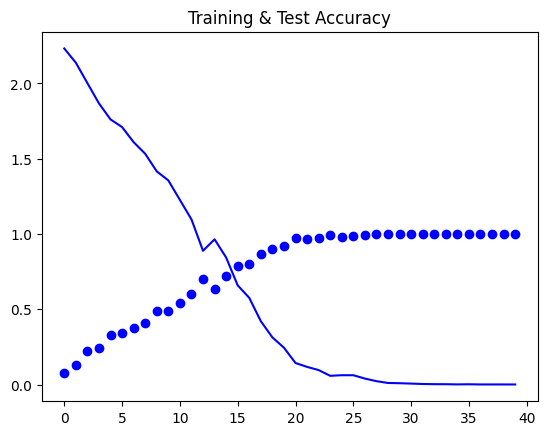

In [52]:
import matplotlib.pyplot as plt
eval = model.evaluate(x_test,y_test,verbose=0)
print('Test loss:', eval[0])
print('Test accuracy;',eval[1])
accuracy = train.history['accuracy']
val_accuracy = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'bo',label='Training Accuracy')
plt.plot(epochs,val_accuracy,'b',label= 'Test Accuracy')
plt.title('Training & Test Accuracy')

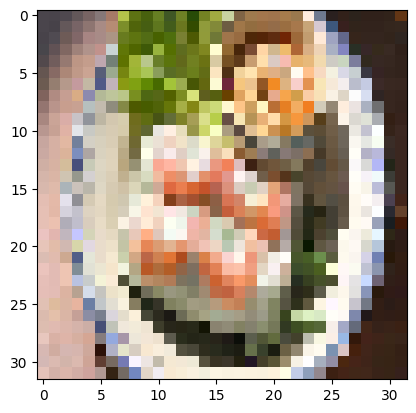

1/1 [==============================] - 0s 18ms/step
Gỏi cuốn


In [56]:
import matplotlib.pyplot as plt
from keras.utils.image_utils import img_to_array 
from keras.utils import load_img 
import numpy as np
img = load_img('/content/drive/MyDrive/Colab Notebooks/10FoodVN/Test_image/Goicuon.jpg',target_size=(32,32))
plt.imshow(img)
plt.show()
img= img_to_array(img)
img =img.reshape(1,32,32,3)
img = img.astype('float32')
img = img /255
Mon_an=np.argmax(model.predict(img),axis=-1)
mon = [' Mì quảng','Cơm tấm','Bánh mì','Gỏi cuốn','Bánh Xèo','Bún chả','Phở','Bánh cuốn','Chè','Bún bò']
for i in range(10):
  if Mon_an==i:
    print(mon[i])

